# App Name: Dynacare - Net Check In

In [1]:
pip install google-play-scraper

Note: you may need to restart the kernel to use updated packages.


In [2]:
from google_play_scraper import app
import pandas as pd
import numpy as np
from google_play_scraper import Sort, reviews_all

# Collect app reviews from Google Play by providing package name of app

In [3]:
us_reviews = reviews_all(
    'com.icsnetcheckin.gamma',
    sleep_milliseconds=0, # defaults to 0
    lang='en', # defaults to 'en'
    country='us', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)

In [4]:
df_busu = pd.DataFrame(np.array(us_reviews),columns=['review'])
df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))
#len(df_busu)
#df_busu.head()

In [5]:
app_reviewsnew_df = pd.DataFrame(df_busu)

del app_reviewsnew_df["userImage"]
del app_reviewsnew_df["reviewId"]
del app_reviewsnew_df["thumbsUpCount"]
del app_reviewsnew_df["reviewCreatedVersion"]
del app_reviewsnew_df["at"]
del app_reviewsnew_df["replyContent"]
#del app_reviewsnew_df["sortOrder"]
del app_reviewsnew_df["repliedAt"]

app_reviewsnew_df.rename(columns = {'content' : 'Review', 'score' : 'Rating'}, inplace = True)

app_reviewsnew_df.head(9999)


,userName,Review,Rating
0,Helen McNair,Estimated wait times are usually double.,4
1,Lorise Cablik,I like that I can check throughout the day and...,5
2,Muruga Nandan,Smart neat fast,5
3,Rabail Khan,There is no way to check how much time until y...,3
4,Anita Thomas,Fantastic. Makes the whole process of going fo...,5
...,...,...,...
236,A Google user,This is great. Book the appt and then leave fr...,5
237,A Google user,Are there more locations in Saskatchewan to be...,1
238,A Google user,That's an awesome idea! I hate waiting. Knowin...,5
239,A Google user,Thank vest application ever,5


## Create an output file of reviews collected 

In [6]:
app_reviewsnew_df.to_csv('com.icsnetcheckin.gamma.csv', index=None, header=True)

In [7]:
pip install num2words

Note: you may need to restart the kernel to use updated packages.


## Read the input file of reviews collected 

In [8]:
pd.set_option('display.max_colwidth',800)
pd.options.mode.chained_assignment = None  # default='warn'
reviews = pd.read_csv("com.icsnetcheckin.gamma.csv", encoding="utf8")

In [9]:
reviews.head(9999)

,userName,Review,Rating
0,Helen McNair,Estimated wait times are usually double.,4
1,Lorise Cablik,I like that I can check throughout the day and arrange my schedule based on my wait time.,5
2,Muruga Nandan,Smart neat fast,5
3,Rabail Khan,There is no way to check how much time until your turn .,3
4,Anita Thomas,Fantastic. Makes the whole process of going for tests faster and easier with minimal waiting. The app itself has been flawless. Great system overall.,5
...,...,...,...
236,A Google user,This is great. Book the appt and then leave from home. The dirty looks from those in the waiting room when I walked in and went straight into the room were priceless.,5
237,A Google user,Are there more locations in Saskatchewan to be added? I think Regina would have been awesome!,1
238,A Google user,That's an awesome idea! I hate waiting. Knowing the estimated wait time: that alone takes away so much frustration!,5
239,A Google user,Thank vest application ever,5


In [10]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

## Pre-processing of reviews

In [11]:
# Find floats
reviews['Review'].apply(lambda x:isinstance(x, float))

# Make all strings
reviews['Review']=reviews['Review'].apply(str)

import string
#print(string.punctuation)

def remove_punctuation(text):
    text_nopunct = ''.join([c for c in text if c not in string.punctuation])
    return text_nopunct

import re

def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

def remove_special_chars(text):
    return(re.sub(r"\W+|_", " ", text)) 

import re
from num2words import num2words

# function to convert numbers to words
def num_to_words(text):
    
# splitting text into words with space
    after_spliting = text.split()

    for index in range(len(after_spliting)):
        if after_spliting[index].isdigit():
            after_spliting[index] = num2words(after_spliting[index])

    # joining list into string with space
    numbers_to_words = ' '.join(after_spliting)
    return numbers_to_words

def remove_extra_spaces(text):

 space_pattern = r'\s+'
 without_space = re.sub(pattern=space_pattern, repl=" ", string=text)
 return without_space

def lower_case_convertion(text):

    lower_text = text.lower()
    return lower_text

from nltk.corpus import stopwords
from nltk import word_tokenize
all_stopwords  = set(stopwords.words('english'))

def remove_stopwords(text):

    text_without_sw = []
    # tokenization
    text_tokens = word_tokenize(text)
    for word in text_tokens:
        # checking word is stopword or not
        if word not in all_stopwords:
            text_without_sw.append(word)

    # joining all tokens after removing stop words
    without_sw = ' '.join(text_without_sw)
    return without_sw


from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

def lemmatization(text):
    # word tokenization
    tokens = word_tokenize(text)

    for index in range(len(tokens)):
     # lemma word
        lemma_word = lemma.lemmatize(tokens[index])
        tokens[index] = lemma_word

    return ' '.join(tokens) 

In [12]:
for ind in reviews.index:
    reviews['Review'][ind]=remove_punctuation(reviews['Review'][ind])    
        
for ind in reviews.index:
     reviews['Review'][ind]=remove_emoji(reviews['Review'][ind])        
        
for ind in reviews.index:
     reviews['Review'][ind]=remove_special_chars(reviews['Review'][ind])        
        
for ind in reviews.index:
     reviews['Review'][ind]=num_to_words(reviews['Review'][ind])        
        
for ind in reviews.index:
     reviews['Review'][ind]=remove_extra_spaces(reviews['Review'][ind])
for ind in reviews.index:
     reviews['Review'][ind]=lower_case_convertion(reviews['Review'][ind])   
        
for ind in reviews.index:
     reviews['Review'][ind]=remove_stopwords(reviews['Review'][ind])  
        
for ind in reviews.index:
     reviews['Review'][ind]=lemmatization(reviews['Review'][ind])  
        
reviews.head(15)

,userName,Review,Rating
0,Helen McNair,estimated wait time usually double,4
1,Lorise Cablik,like check throughout day arrange schedule based wait time,5
2,Muruga Nandan,smart neat fast,5
3,Rabail Khan,way check much time turn,3
4,Anita Thomas,fantastic make whole process going test faster easier minimal waiting app flawless great system overall,5
5,John Moehring,useless app majority clinic longer allow checking wait time never correct today attended one indicated wait time zero minute ended waiting twenty minute wait time changed twice five min wait nine min wait,1
6,Shannon Chambers,whats point early check stoney creek aand still took four people ahead arrive,1
7,Gilles Laframboise,must best helpful app,5
8,Andy Silis,wait time displayed unrealistic plus get clinic wait time line checking counter longer stated wait time finally get blood testing tourist cut line made appointment online think wait line cut staff accept completely ignoring individual cut line,2
9,Rabi Qureshi,far good pretty straight forward use,4


## Sentiment Analysis using Vader

In [13]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\gilla\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [14]:
app1_sentiment_vader = reviews[["Review"]]
app1_sentiment_vader['scores'] = app1_sentiment_vader['Review'].apply(lambda review: sid.polarity_scores(review))
app1_sentiment_vader.head(9999)

,Review,scores
0,estimated wait time usually double,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
1,like check throughout day arrange schedule based wait time,"{'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'compound': 0.3612}"
2,smart neat fast,"{'neg': 0.0, 'neu': 0.149, 'pos': 0.851, 'compound': 0.6908}"
3,way check much time turn,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
4,fantastic make whole process going test faster easier minimal waiting app flawless great system overall,"{'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'compound': 0.93}"
...,...,...
236,great book appt leave home dirty look waiting room walked went straight room priceless,"{'neg': 0.204, 'neu': 0.498, 'pos': 0.299, 'compound': 0.4404}"
237,location saskatchewan added think regina would awesome,"{'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'compound': 0.6249}"
238,thats awesome idea hate waiting knowing estimated wait time alone take away much frustration,"{'neg': 0.384, 'neu': 0.437, 'pos': 0.179, 'compound': -0.5719}"
239,thank vest application ever,"{'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'compound': 0.3612}"


In [15]:
#Now will call out compound which is a polarity as a separate column and all values greater than zeroes will be considered 
#a positive review and all values less than zero would be considered as a negative review.
app1_sentiment_vader['Polarity']  = app1_sentiment_vader['scores'].apply(lambda score_dict: score_dict['compound'])
app1_sentiment_nvader = app1_sentiment_vader[["Review","Polarity"]]

In [16]:
app1_sentiment_nvader['Sentiment_Type']=''
app1_sentiment_nvader.loc[app1_sentiment_nvader.Polarity>0,'Sentiment_Type']='POSITIVE'
app1_sentiment_nvader.loc[app1_sentiment_nvader.Polarity==0,'Sentiment_Type']='NEUTRAL'
app1_sentiment_nvader.loc[app1_sentiment_nvader.Polarity<0,'Sentiment_Type']='NEGATIVE'
app1_sentiment_comparison = app1_sentiment_nvader[["Review"]]
app1_sentiment_comparison['polarity']= app1_sentiment_nvader["Polarity"]
app1_sentiment_comparison['Sentiment_Type']= app1_sentiment_nvader["Sentiment_Type"]

# Table showing Polarity and Sentiment type using Vader Sentiment Analysis

In [17]:
app1_sentiment_comparison.head(9999)

,Review,polarity,Sentiment_Type
0,estimated wait time usually double,0.0000,NEUTRAL
1,like check throughout day arrange schedule based wait time,0.3612,POSITIVE
2,smart neat fast,0.6908,POSITIVE
3,way check much time turn,0.0000,NEUTRAL
4,fantastic make whole process going test faster easier minimal waiting app flawless great system overall,0.9300,POSITIVE
...,...,...,...
236,great book appt leave home dirty look waiting room walked went straight room priceless,0.4404,POSITIVE
237,location saskatchewan added think regina would awesome,0.6249,POSITIVE
238,thats awesome idea hate waiting knowing estimated wait time alone take away much frustration,-0.5719,NEGATIVE
239,thank vest application ever,0.3612,POSITIVE


# Count of positive, negative, and neutral reviews using Vader Sentiment Analysis 

In [18]:
app1_sentiment_nvader['Sentiment_Type'].value_counts()

POSITIVE    110
NEGATIVE     74
NEUTRAL      57
Name: Sentiment_Type, dtype: int64

<AxesSubplot:title={'center':'Vader Sentiment Analysis'}>

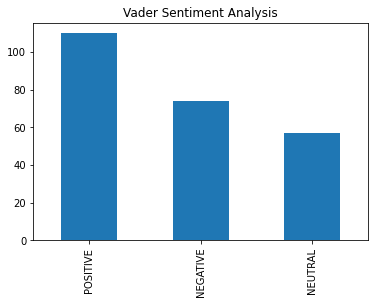

In [19]:
app1_sentiment_nvader.Sentiment_Type.value_counts().plot(kind='bar',title="Vader Sentiment Analysis")

## Sentiment Analysis using Textblob

In [20]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [21]:
from textblob import TextBlob

In [22]:
app1_sentiment = reviews[["Review"]]
polar=[]
for ind in app1_sentiment.index:
        sentence = app1_sentiment['Review'][ind]
        blob = TextBlob(sentence)
        blob.sentiment
        print(blob.sentiment)
        polar.append(blob.sentiment.polarity)
        
app1_sentiment["Polarity"]=polar

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.20714285714285713, subjectivity=0.6214285714285714)
Sentiment(polarity=0.2, subjectivity=0.2)
Sentiment(polarity=0.3833333333333333, subjectivity=0.6083333333333333)
Sentiment(polarity=-0.5, subjectivity=0.2)
Sentiment(polarity=0.1, subjectivity=0.3)
Sentiment(polarity=1.0, subjectivity=0.3)
Sentiment(polarity=-0.1, subjectivity=0.7)
Sentiment(polarity=0.31249999999999994, subjectivity=0.75)
Sentiment(polarity=0.5, subjectivity=0.6)
Sentiment(polarity=-0.08888888888888884, subjectivity=0.5)
Sentiment(polarity=0.8, subjectivity=0.75)
Sentiment(polarity=0.5, subjectivity=0.525)
Sentiment(polarity=0.8, subjectivity=0.75)
Sentiment(polarity=0.5, subjectivity=0.675)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=0.4, subjectivity=0.375)
Sentiment(polarity=-0.5, subjectivity=0.2)
Sentiment(polarity=0.25, subjectivity=0.25)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(

In [23]:
#app1_sentiment['Sentiment_Type'] = app1_sentiment['Polarity'].apply(lambda c: 'pos' if c >=0 else 'neg')
#app1_sentiment.head()

app1_sentiment['Sentiment_Type']=''
app1_sentiment.loc[app1_sentiment.Polarity>0,'Sentiment_Type']='POSITIVE'
app1_sentiment.loc[app1_sentiment.Polarity==0,'Sentiment_Type']='NEUTRAL'
app1_sentiment.loc[app1_sentiment.Polarity<0,'Sentiment_Type']='NEGATIVE'

app1_sentiment_comparison = app1_sentiment_nvader[["Review"]]
app1_sentiment_comparison['textblob_polarity']= app1_sentiment["Polarity"]
app1_sentiment_comparison['textblob_Sentiment_Type']= app1_sentiment["Sentiment_Type"]

# Table showing Polarity and Sentiment type using TextBlob Sentiment Analysis

In [24]:
app1_sentiment_comparison.head(9999)

,Review,textblob_polarity,textblob_Sentiment_Type
0,estimated wait time usually double,0.000000,NEUTRAL
1,like check throughout day arrange schedule based wait time,0.000000,NEUTRAL
2,smart neat fast,0.207143,POSITIVE
3,way check much time turn,0.200000,POSITIVE
4,fantastic make whole process going test faster easier minimal waiting app flawless great system overall,0.383333,POSITIVE
...,...,...,...
236,great book appt leave home dirty look waiting room walked went straight room priceless,0.350000,POSITIVE
237,location saskatchewan added think regina would awesome,1.000000,POSITIVE
238,thats awesome idea hate waiting knowing estimated wait time alone take away much frustration,0.133333,POSITIVE
239,thank vest application ever,0.000000,NEUTRAL


# Count of positive, negative, and neutral reviews using TextBlob Sentiment Analysis 

In [25]:
app1_sentiment['Sentiment_Type'].value_counts()

POSITIVE    109
NEGATIVE     72
NEUTRAL      60
Name: Sentiment_Type, dtype: int64

<AxesSubplot:title={'center':'Textblob Sentiment Analysis'}>

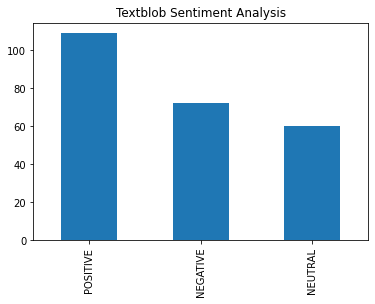

In [26]:
app1_sentiment.Sentiment_Type.value_counts().plot(kind='bar',title="Textblob Sentiment Analysis")

From my tests, VADER seems to work better with things like slang, emojis, etc — whereas TextBlob performs strongly with more formal language usage. VADER not only tells the lexicon is positive, negative, or neutral, it also tells how positive, negative, or neutral a sentence is. VADER gave the correct output with some of the problematic sentences and executed. The output brought me to the conclusion that TextBlob was struggling with negative sentences, particularly negations. VADER outperforms TextBlob when it comes to negative polarity detection. We can conclude that VADER does better sentiment analysis when it comes to negative polarity detection. 

## Top 15 frequent words in Reviews 

In [27]:
#how to get the top 100 frequent words on a python dataframe colummn
from collections import Counter
mostCommonWord = Counter(" ".join(app1_sentiment_comparison["Review"]).split()).most_common(15)
df_mostCommonWords = pd.DataFrame(mostCommonWord, columns =['Word', 'Frequency'])
df_mostCommonWords

,Word,Frequency
0,app,112
1,time,90
2,location,63
3,wait,60
4,check,55
5,work,47
6,get,31
7,great,26
8,useless,25
9,one,25


<AxesSubplot:xlabel='Word'>

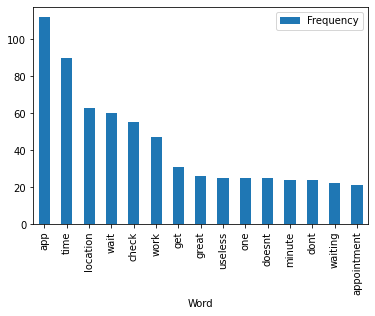

In [28]:
df_mostCommonWords.plot(x ='Word', y='Frequency', kind = 'bar')
